In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
import cv2
import h5py
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings("ignore")

Question 1

Given the following data use Principal Component Analysis to reduce the feature
dimension from 3 to 1 also show eigen values. (Do manual calculation)

In [ ]:
x1 = [8,13,4,7,19,5]
x2 = [14,9,3,2,8,18]
x3 = [3,6,15,1,4,11]
X = [x1, x2, x3]
X = np.array(X)
X = X.T
print(X)

[[ 8 14  3]
 [13  9  6]
 [ 4  3 15]
 [ 7  2  1]
 [19  8  4]
 [ 5 18 11]]


In [ ]:
# defining required array
X = np.array([[8,14,3],[13,9,6],[4,3,15],[7,2,1],[19,8,4],[5,18,11]])

# standard scaler to make mean 0 and variance 1
sc = StandardScaler()
X_std = sc.fit_transform(X)

# performing PCA
pca = PCA(n_components =1)
principalComponent = pca.fit_transform(X_std)
pComponents = pd.DataFrame(data = principalComponent , columns = ['principal component 1'])

# printing the variance ratio of each component 
print("Variance ratio: ", pca.explained_variance_ratio_)

print ("\n\nThe first principal component is: ")
print(pComponents)

print ("\n\nThe eigenvalues after the dimension reduction by PCA of the given data are :")
print(pca.components_)

Variance ratio:  [0.49991964]


The first principal component is: 
   principal component 1
0              -0.204236
1              -0.586974
2               1.740811
3              -0.710952
4              -1.708027
5               1.469378


The eigenvalues after the dimension reduction by PCA of the given data are :
[[-0.69401025  0.16586365  0.70059904]]


In [ ]:
#MANUAL CALCULATION
from numpy import mean
from numpy import cov
from numpy import array
from numpy.linalg import eig

# calculating the mean of each column
Mean = mean(X.T, axis=1)

# determining center columns by subtracting column means
X_STD = X - Mean

# calculating covariance matrix of centered matrix
Va = cov(X_STD.T)

# eigendecomposition of covariance matrix
values, vectors = eig(Va)
print("Eigen Vectors :\n",vectors,'\n')
print("Eigen Values :\n",values,'\n')

# projectnig the data
Prj = vectors.T.dot(X_STD.T)
print(Prj.T)

Eigen Vectors :
 [[ 0.65370829  0.70071725 -0.28576354]
 [-0.04563208 -0.34043372 -0.93916058]
 [ 0.75536957 -0.62697704  0.19056916]] 

Eigen Values :
 [15.41684401 46.07005232 37.44643701] 

[[-3.86945988 -0.33754247 -5.01353842]
 [ 1.89335068  2.98728129 -1.17484576]
 [ 3.08209469 -6.91936503  8.74711203]
 [-5.48632232  4.30089903  6.16101375]
 [ 4.35049337  8.78597262 -2.33140475]
 [ 0.02984346 -8.81724545 -6.38833684]]


Question 2

A classic application of PCA is to project the 3-D point cloud onto a plane that could still retain the information or essence of the point distribution. Given a 3-D point cloud, estimate an optimal plane, onto which if the 3D data points when projected would still retain the essential information. We provide you with 5 different point clouds P_1.txt to P_5.txt containing the 3D coordinates of points in space. Perform PCA on these point clouds to obtain their projection on a 2D plane and visualize the results using python libraries (like matplotlib).

In [ ]:
# reading the data files
p1 = np.array(pd.read_csv('/content/P_1.txt', header = None , delim_whitespace = True))
p2 = np.array(pd.read_csv('/content/P_2.txt', header = None , delim_whitespace = True))
p3 = np.array(pd.read_csv('/content/P_3.txt', header = None , delim_whitespace = True))
p4 = np.array(pd.read_csv('/content/P_4.txt', header = None , delim_whitespace = True))
p5 = np.array(pd.read_csv('/content/P_5.txt', header = None , delim_whitespace = True))

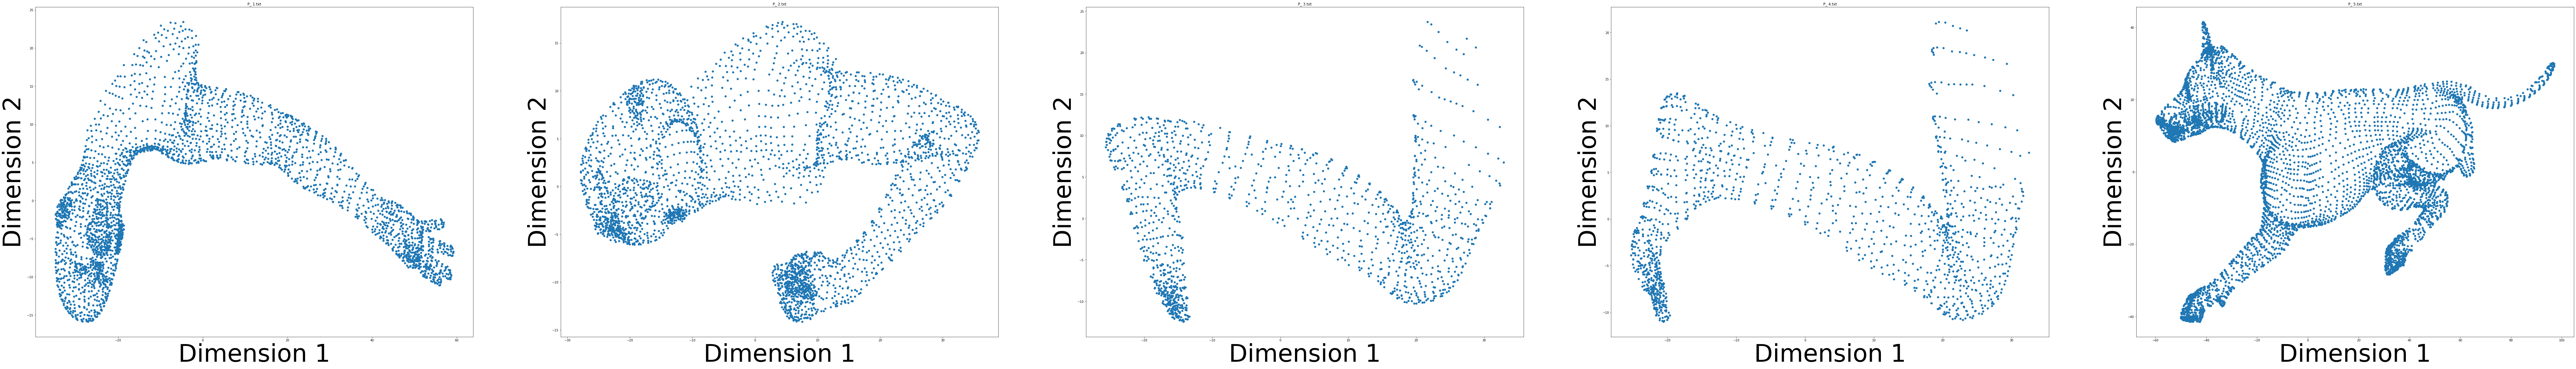

In [ ]:
fig = plt.figure(figsize=(150 , 20))
subplot_index = 1

# 2-D PLOTING
for point_cloud in [p1 , p2 , p3 , p4 , p5]:
  pca = PCA(n_components = 2)
  principal_components = pca . fit_transform(point_cloud , y = None)

  plt.subplot(1,5,subplot_index)
  plt.scatter( principal_components[: ,0] , principal_components[: ,1])
  plt.xlabel('Dimension 1', fontsize =80)
  plt.ylabel('Dimension 2', fontsize =80)
  plt.title('P_ '+ str(subplot_index) + '.txt')
  subplot_index += 1

Question 3

Another classic example of PCA comes in image compression. The human eye cannot perceive the minute and frequent changes in the image. A typical smartphone camera takes a 5MP image on average. We will utilize PCA and analyze how the reduction in the no. of principal components or dimensions affects the visual quality of the image. Given an image, apply PCA to investigate the effect of reducing the dimensions on the visual quality of the image. You will use this image and show the analysis.


Answer

Code

(870, 870, 3)


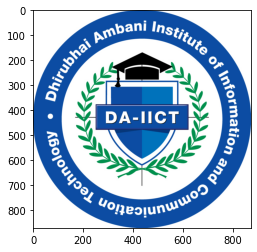

In [ ]:
img = cv2.cvtColor(cv2.imread('/content/DA-IICT-Emblem-Final Colour.jpg'), cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

In [ ]:
blue,green,red = cv2.split(img)

(870, 870, 3)


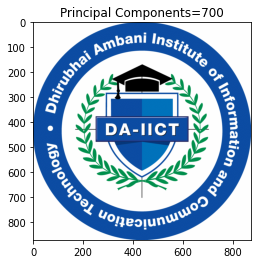

(870, 870, 3)


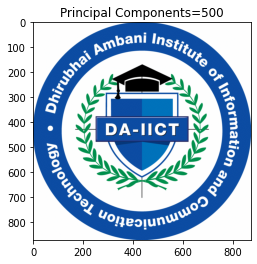

(870, 870, 3)


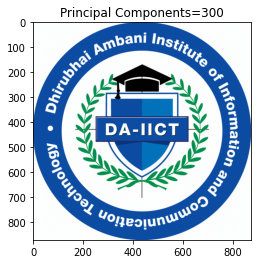

(870, 870, 3)


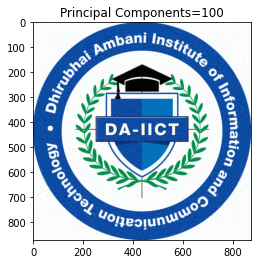

(870, 870, 3)


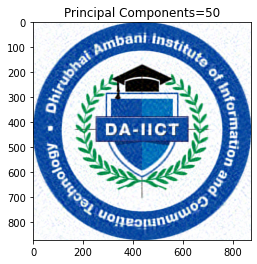

(870, 870, 3)


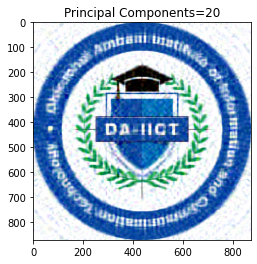

(870, 870, 3)


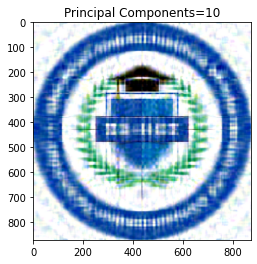

(870, 870, 3)


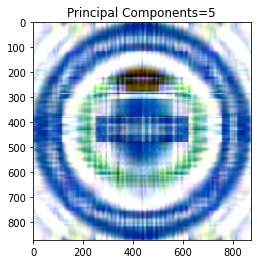

(870, 870, 3)


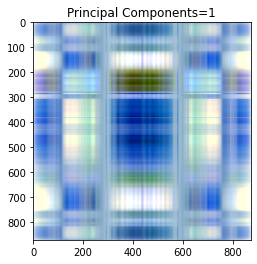

In [ ]:
# Normalizing the Color arrays
scaled_blue = blue/255
scaled_green = green/255
scaled_red = red/255
# Taking different Components to test image transformation on different amount␣of Principal Components
pcas=np.array([700,500,300,100,50,20,10,5,1])
variance_ratio_blue = []
variance_ratio_green = []
variance_ratio_red = []
for num in pcas:

  # Applying PCA on Blue Color
  pb = PCA(n_components=num)
  pb.fit(scaled_blue)
  transformed_scaled_blue = pb.transform(scaled_blue)
  new_blue = pb.inverse_transform(transformed_scaled_blue)

  # Applying PCA on Green Color
  pg = PCA(n_components=num)
  pg.fit(scaled_green)
  transformed_scaled_green = pg.transform(scaled_green)
  new_green = pg.inverse_transform(transformed_scaled_green)

  # Applying PCA on Red Color
  pr = PCA(n_components=num)
  pr.fit(scaled_red)
  transformed_scaled_red = pr.transform(scaled_red)
  new_red = pr.inverse_transform(transformed_scaled_red)

  # Computing Explained Variance
  variance_ratio_blue.append(np.sum(pb.explained_variance_ratio_))
  variance_ratio_green.append(np.sum(pg.explained_variance_ratio_))
  variance_ratio_red.append(np.sum(pr.explained_variance_ratio_))

  # Merging back the transformed arrays
  new_image = cv2.merge((new_blue,new_green,new_red))
  plt.figure()
  print(new_image.shape)
  plt.title('Principal Components='+str(num))
  plt.imshow(new_image)
  plt.show()
  

Result

The images for different value of principal components is as shown above.

Observation/Justification

As the number of principal components decreases, the quality of the image

Question 4

Load the Data matrix faceimages.mat given to you. There are 400 face images of
size 112×92.

a. Last column of the data is the class label. Column 1 to 10304 are 112×92 pixel. <br>
b. Each row represents one image.<br>
c. Construct the data matrix and Mean-center the data.<br>
d. Construct covariance matrix for the data.<br>
e. Solve eigenvalue problem to find projection matrix.<br>


● Find low dimensional representation of Face images<br>
● Draw energy curve of PCA for the given data<br>
● Reconstruct any face image with 5, 10, 50 and 100 principal components.<br>
● Compute the reconstruction error for the same.<br>

In [3]:
#loading data from .mat file
filepath = "/content/faceimages.mat"
with h5py.File(filepath, 'r') as file:
  print(list(file.keys()))
  data = np.array(file['data'])
#construct the data matrix
x = data[:-1, :]
y = data[-1, :]

#mean center the data
x_mean = [np.mean(j) for j in x]
x = x.T
x = StandardScaler().fit_transform(x)

['Database_name', 'Record_Name', 'data', 'height', 'width']


In [ ]:
#construct the covariance matrix for the data
x_cov_mat = np.cov(x.T)
eig_val_asc, eig_vect_asc = np.linalg.eigh(x_cov_mat)
eig_val = np.flip(eig_val_asc)
eig_vect = np.flip(eig_vect_asc, axis=1)
var_exp = [(i/sum(eig_val)) for i in eig_val]
cum_var_exp = np.cumsum(var_exp)
plt.plot(range(10304), cum_var_exp[:])
plt.xlabel('No. of PCs')
plt.ylabel('Energy')

In [ ]:
x_cov_mat

In [ ]:
fig, ax = plt.subplots(2,8, sharey = True, figsize = (16,4))
random_index = random.sample(range(100), 16)
for i in range(16):
  ax[int(i/8)][i%8].imshow(eig_vect[:, random_index[i]].reshape(92,112).T,cmap='gray')
fig.suptitle('16 random low dimensional representation out of 100 images',fontsize=15)

In [ ]:
def n_pcs(n, ith):

#ith is the ith image out of 400 images available in the dataset
#taking last n components as the eigen values are in ascending order
eigenvec_n = eig_vect[:, :n]
plt.subplot(121)
plt.imshow(x[ith, :].reshape(92, 112).T, cmap='gray')
plt.title('Original')
#reducing dimensions
x_red = x[ith].dot(eigenvec_n)
#reconstuct
x_rec = x_red.dot(eigenvec_n.T)
plt.subplot(122)
plt.imshow(x_rec[:].reshape(92, 112).T, cmap='gray')
plt.title('Reconstructed')
recon_error = sqrt(mean_squared_error(x[ith], x_rec))
print('Reconstruction Error:', recon_error)

In [ ]:
n_pcs(5,10)
n_pcs(10,10)
n_pcs(50,10)
n_pcs(100,10)

Question 5

Apply PCA on the MNIST dataset. Plot cumulative sum of variance with no of components and find the minimum no. of component for 85% variance.

In [ ]:
# Fetching the MNIST Dataset
mnist_dataset = fetch_openml('mnist_784')
print(mnist_dataset.target)

In [ ]:
# Creating Data & Target arrays From the dataset
X = pd.DataFrame(data = mnist_dataset.data, columns = mnist_dataset.
,→feature_names)
y = mnist_dataset.target.astype('int64')
print(y)

In [ ]:
# Constructing a PCA model with 200 components
pca_model = PCA(n_components=200)
pca_model.fit(X)

In [ ]:
# Computing cumulative variance of the model
cumulative_variance = pca_model.explained_variance_ratio_.cumsum() * 100
print(cumulative_variance)

In [ ]:
# Extracting Optimal number of PCA components required to get 85% variance
components = 0
for i in range(len(cumulative_variance)):
if cumulative_variance[i] > 85:
components = i
break
print(components)

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(cumulative_variance, 'g')
plt.annotate('Optimal Components = 58', xy =(58, 85),
arrowprops = dict(facecolor ='red',
shrink = 0.05),)

plt.xlabel('Number Of Components')
plt.ylabel('Explained Variance in %')
plt.show()

Observation/Justification

